In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Resultado Fiscal - último mes reportado 2019


### Ingresos Totales (Formato IMIG)

In [3]:
# Armo los dataframes con los ids de los componentes de cada uno de los subtotales "tributarios", "rentas", "otros corrientes" y "capital"
 
it_tributarios= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=452.2_IVA_NETO_RROS_0_T_19_67,452.2_GANANCIASIAS_0_T_9_51,452.2_APORTES_COIAL_0_T_39_29,452.2_DEBITOS_CRTOS_0_T_16_22,452.2_BIENES_PERLES_0_T_17_26,452.2_IMPUESTOS_NOS_0_T_18_87,452.2_COMBUSTIBLLES_0_T_12_97,452.2_DERECHOS_EION_0_T_20_42,452.2_DERECHOS_IION_0_T_20_60,452.2_RESTO_TRIBIOS_0_T_17_0&limit=5000&format=csv")
it_rentas= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=452.2_FGS_COBRADERO_0_T_53_90,452.2_RESTO_RENTDAD_0_T_22_24&limit=5000&format=csv")
it_otros= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=452.2_INGRESOS_NIOS_0_T_23_2,452.2_TRANSFERENTES_0_T_25_22,452.2_RESTO_INGRTES_0_T_25_96&limit=5000&format=csv")
it_capital= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=452.2_INGRESOS_CTAL_0_T_16_75&limit=5000&format=csv")

# Transformo a formato de datetime y pongo como índice al campo "indice_tiempo"
it_tributarios.indice_tiempo= pd.to_datetime(it_tributarios.indice_tiempo)
it_rentas.indice_tiempo= pd.to_datetime(it_rentas.indice_tiempo)
it_otros.indice_tiempo= pd.to_datetime(it_otros.indice_tiempo)
it_capital.indice_tiempo= pd.to_datetime(it_capital.indice_tiempo)

it_tributarios= it_tributarios.set_index("indice_tiempo")
it_rentas= it_rentas.set_index("indice_tiempo")
it_otros= it_otros.set_index("indice_tiempo")
it_capital= it_capital.set_index("indice_tiempo")


In [12]:
#Como no contamos con los subtotales de Tributarios, Rentas, Otros Corrientes y capital para el armado del Resumen del mes IMIG,
#lo armamos trasponiendo los dataframe y sumando todos sus compoonentes. Esto nos va a permitir tener las series deseadas 
#y formar un dataframe con una estructura similar a la que queríamos llegar.

# it_tributarios.T.sum(), 
# it_rentas.T.sum(),
# it_otros.T.sum(),
# it_capital.T.sum(),
total=it_tributarios.T.sum() + it_rentas.T.sum() + it_otros.T.sum() + it_capital.T.sum()

# creamos un dataframe para Ingresos Totales con todos sus componentes. #VER COMO REORDENAR LAS FILAS!!!
ingresos_totales = pd.DataFrame({
    "I.a) Tributarios": it_tributarios.T.sum(), 
    "I.b) Rentas": it_rentas.T.sum(),
    "I.c) Otros_Corrientes": it_otros.T.sum(),
    "I.d) Capital": it_capital.T.sum(),
    "Total Ingresos Totales":total
})


ingresos_totales.index=ingresos_totales.index.to_period()

## PARA CONSIDERAR SIEMPRE EL ÚLTIMO PERIODO DE LA SERIE Y EL DEL AÑO ANTERIOR GENERO LAS VARIABLES periodo_actual y periodo_anio_anterior
periodo_actual = ingresos_totales.index.max()
periodo_anio_anterior = periodo_actual - 12

imig_it=ingresos_totales[(ingresos_totales.index==periodo_anio_anterior)|(ingresos_totales.index==periodo_actual)].pivot_table(columns="indice_tiempo")

imig_it["var%_anual"]= round( (imig_it[periodo_actual] / imig_it[periodo_anio_anterior]) - 1, 4) * 100

# Quisiera agregar la diferencia absoluta en $
# PORQUE NO ME SIRVE ÉSTA ASIGNACIÓN?? 
imig_it.columns = imig_it.columns.astype(str)
imig_it["var$_anual"]= imig_it[str(object= periodo_actual)] - imig_it[str(object=periodo_anio_anterior)]

imig_it= imig_it.rename(columns={"indice_tiempo": "Concepto"})
imig_it



indice_tiempo,2018-07,2019-07,var%_anual,var$_anual
I.a) Tributarios,205571.6,314941.8,53.20,109370.2
I.b) Rentas,14605.1,27241.4,86.52,12636.3
I.c) Otros_Corrientes,7511.2,21290.9,183.46,13779.7
I.d) Capital,4931.0,12392.5,151.32,7461.5
Total Ingresos Totales,232618.9,375866.6,61.58,143247.7


### Gastos primarios (Formato IMIG)

In [19]:
# Armo los dataframes con los ids de los componentes de cada uno de los subtotales "tributarios", "rentas", "otros corrientes" y "capital"
 
gtos_prestaciones_sociales= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=452.2_JUBILACIONVAS_0_T_36_18,452.2_ASIGNACIONIJO_0_T_26_67,452.2_PENSIONES_VAS_0_T_26_164,452.2_PRESTACIONSJP_0_T_19_86,452.2_OTROS_PROGMAS_0_T_15_11&limit=5000&format=csv")
gtos_subsidios= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=452.2_ENERGIAGIA_0_T_7_56,452.2_TRANSPORTERTE_0_T_10_32,452.2_OTRAS_FUNCNES_0_T_15_25&limit=5000&format=csv")
gtos_funcionamiento= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=452.2_SALARIOSIOS_0_T_8_22,452.2_OTROS_GASTNTO_0_T_27_55&limit=5000&format=csv")
gtos_corrientes= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=452.2_TRANSFERENION_0_T_46_94,452.2_TRANSFERENIAL_0_T_53_66,452.2_TRANSFERENIAL_0_T_54_58,452.2_TRANSFERENLUD_0_T_42_88,452.2_TRANSFERENRAS_0_T_42_55&limit=5000&format=csv")
gtos_otros_ctes= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=452.2_OTROS_CORRDES_0_T_45_79,452.2_OTROS_CORRCAS_0_T_52_16,452.2_OTROS_CORRSTO_0_T_22_78&limit=5000&format=csv")




gtos_energia= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=452.2_CAPITAL_ENION_0_T_22_35,452.3_CAPITAL_ENIAS_0_M_40_18&limit=5000&format=csv")
gtos_transporte= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=452.3_CAPITAL_TRION_0_M_25_82,452.3_CAPITAL_TRIAS_0_M_43_35&limit=5000&format=csv")
gtos_educacion= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=452.3_CAPITAL_EDION_0_M_24_92,452.3_CAPITAL_EDIAS_0_M_42_42&limit=5000&format=csv")
gtos_vivienda= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=452.3_CAPITAL_VIION_0_M_23_52,452.3_CAPITAL_VIIAS_0_M_41_41&limit=5000&format=csv")
gtos_agua_alcantarillado= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=452.3_CAPITAL_AGION_0_M_41_40,452.3_CAPITAL_AGIAS_0_M_59_12&limit=5000&format=csv")
gtos_otros= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=452.3_CAPITAL_OTION_0_M_20_10,452.3_CAPITAL_OTIAS_0_M_38_72&limit=5000&format=csv")



# Transformo a formato de datetime y pongo como índice al campo "indice_tiempo"


#gtos_corrientes_primarios= 
gtos_prestaciones_sociales.indice_tiempo= pd.to_datetime(gtos_prestaciones_sociales.indice_tiempo)
gtos_subsidios.indice_tiempo= pd.to_datetime(gtos_subsidios.indice_tiempo)
gtos_funcionamiento.indice_tiempo= pd.to_datetime(gtos_funcionamiento.indice_tiempo)
gtos_corrientes.indice_tiempo= pd.to_datetime(gtos_corrientes.indice_tiempo)
gtos_otros_ctes.indice_tiempo= pd.to_datetime(gtos_otros_ctes.indice_tiempo)


gtos_prestaciones_sociales= gtos_prestaciones_sociales.set_index("indice_tiempo")
gtos_subsidios= gtos_subsidios.set_index("indice_tiempo")
gtos_funcionamiento= gtos_funcionamiento.set_index("indice_tiempo")
gtos_corrientes= gtos_corrientes.set_index("indice_tiempo")
gtos_otros_ctes= gtos_otros_ctes.set_index("indice_tiempo")



#gtos_capital= 
gtos_energia.indice_tiempo= pd.to_datetime(gtos_energia.indice_tiempo)
gtos_transporte.indice_tiempo= pd.to_datetime(gtos_transporte.indice_tiempo)
gtos_educacion.indice_tiempo= pd.to_datetime(gtos_educacion.indice_tiempo)
gtos_vivienda.indice_tiempo= pd.to_datetime(gtos_vivienda.indice_tiempo)
gtos_agua_alcantarillado.indice_tiempo= pd.to_datetime(gtos_agua_alcantarillado.indice_tiempo)
gtos_otros.indice_tiempo= pd.to_datetime(gtos_otros.indice_tiempo)


gtos_energia= gtos_energia.set_index("indice_tiempo")
gtos_transporte= gtos_transporte.set_index("indice_tiempo")
gtos_educacion= gtos_educacion.set_index("indice_tiempo")
gtos_vivienda= gtos_vivienda.set_index("indice_tiempo")
gtos_agua_alcantarillado= gtos_agua_alcantarillado.set_index("indice_tiempo")
gtos_otros= gtos_otros.set_index("indice_tiempo")

total_gpp= gtos_prestaciones_sociales.T.sum()+gtos_subsidios.T.sum()+ gtos_funcionamiento.T.sum()+gtos_corrientes.T.sum()+gtos_otros_ctes.T.sum()
total_gcp= gtos_energia.T.sum()+  gtos_transporte.T.sum()+ gtos_educacion.T.sum()+gtos_vivienda.T.sum()+ gtos_agua_alcantarillado.T.sum()+gtos_otros_ctes.T.sum()

# creamos un dataframe para Ingresos Totales con todos sus componentes. #VER COMO REORDENAR LAS FILAS!!!
gastos_primarios = pd.DataFrame({
    "II.a).1. Prestaciones Sociales": gtos_prestaciones_sociales.T.sum(), 
    "II.a).2. Subsidios económicos": gtos_subsidios.T.sum(),
    "II.a).3. Gastos de Funcionamiento y otros": gtos_funcionamiento.T.sum(),
    "II.a).4. Transferencias corrientes a provincias": gtos_corrientes.T.sum(),
    "II.a).5. Otros gastos corrientes": gtos_otros_ctes.T.sum(),
    "II.a)Total Gastos Corrientes Primarios":total_gpp,
    "II.b).1. Energia": gtos_energia.T.sum(), 
    "II.b).2. Transporte": gtos_transporte.T.sum(),
    "II.b).3. Educación": gtos_educacion.T.sum(),
    "II.b).4. Vivienda": gtos_vivienda.T.sum(),
    "II.b).5. Agua potable y alcantarillado": gtos_agua_alcantarillado.T.sum(),
    "II.b).6. Otros gastos de capital": gtos_otros_ctes.T.sum(),
    "II.b)Total Gastos de Capital":total_gcp,
    "Total Gastos Primarios":total_gpp+total_gcp
})

gastos_primarios

gastos_primarios.index=gastos_primarios.index.to_period()

## PARA CONSIDERAR SIEMPRE EL ÚLTIMO PERIODO DE LA SERIE Y EL DEL AÑO ANTERIOR GENERO LAS VARIABLES periodo_actual y periodo_anio_anterior
periodo_actual = gastos_primarios.index.max()
periodo_anio_anterior = periodo_actual - 12

imig_gp=gastos_primarios[(gastos_primarios.index==periodo_anio_anterior)|(gastos_primarios.index==periodo_actual)].pivot_table(columns="indice_tiempo")

imig_gp["var%_anual"]= round( (imig_gp[periodo_actual] / imig_gp[periodo_anio_anterior]) - 1, 4) * 100

# Quisiera agregar la diferencia absoluta en $
# PORQUE NO ME SIRVE ÉSTA ASIGNACIÓN?? 
imig_gp.columns = imig_gp.columns.astype(str)
imig_gp["var$_anual"]= imig_gp[str(object= periodo_actual)] - imig_gp[str(object=periodo_anio_anterior)]

imig_gp= imig_gp.rename(columns={"indice_tiempo": "Concepto"})
imig_gp


indice_tiempo,2018-07,2019-07,var%_anual,var$_anual
II.a).1. Prestaciones Sociales,132809.3,197498.4,48.71,64689.1
II.a).2. Subsidios económicos,23762.1,45564.2,91.75,21802.1
II.a).3. Gastos de Funcionamiento y otros,51210.6,68279.6,33.33,17069.0
II.a).4. Transferencias corrientes a provincias,6057.3,20412.0,236.98,14354.7
II.a).5. Otros gastos corrientes,16273.3,18639.8,14.54,2366.5
II.a)Total Gastos Corrientes Primarios,230112.6,350394.0,52.27,120281.4
II.b).1. Energia,1834.1,1470.7,-19.81,-363.4
II.b).2. Transporte,4325.1,10306.9,138.30,5981.8
II.b).3. Educación,768.6,1514.3,97.02,745.7
II.b).4. Vivienda,1821.6,2587.9,42.07,766.3


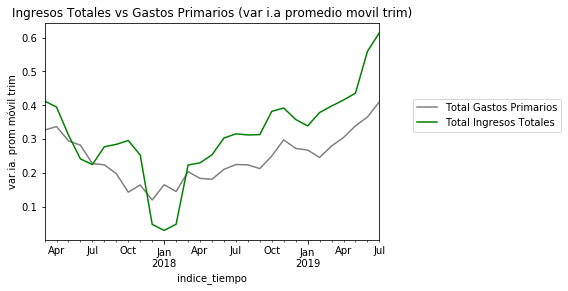

In [85]:
gp=gastos_primarios["Total Gastos Primarios"]
it= ingresos_totales["Total Ingresos Totales"]
gp.rolling(3).mean().pct_change(12).plot(color="gray")
it.rolling(3).mean().pct_change(12).plot(color="green")
plt.title("Ingresos Totales vs Gastos Primarios (var i.a promedio movil trim)",)
plt.xlim("2017-03", periodo_actual);
plt.legend(loc=[1.1,0.5]);
plt.ylabel("var.ia. prom móvil trim");

In [87]:
cod_mes= {1: "enero",
    2: "febrero",
    3: "marzo",
    4: "abril",
    5: "mayo",
    6: "junio",
    7: "julio",
    8: "agosto",
    9: "septiembre",
    10: "octubre",
    11: "noviembre",
    12: "diciembre"}

rp=pd.read_csv("https://apis.datos.gob.ar/series/api/series/?&ids=452.3_RESULTADO_RIO_0_M_18_54&limit=5000&format=csv")

rp["indice_tiempo"] = pd.to_datetime(rp["indice_tiempo"])
rp=rp.set_index("indice_tiempo")


mes_actual= rp.index.max().month

## PARA CONSIDERAR SIEMPRE EL ÚLTIMO PERIODO DE LA SERIE Y EL DEL AÑO ANTERIOR GENERO LAS VARIABLES periodo_actual y periodo_anio_anterior
rp.index=rp.index.to_period()
periodo_actual = rp.index.max()
periodo_anio_anterior = periodo_actual - 12

rp=rp[(rp.index==periodo_anio_anterior)|(rp.index==periodo_actual)].pivot_table(columns="indice_tiempo")

rp["var%_anual"]= round( (rp[periodo_actual] / rp[periodo_anio_anterior]) - 1, 4) * 100
#rp.loc["resultado_primario",
rp
rp.columns = rp.columns.astype(str)
rp_actual=int(round(rp.loc["resultado_primario", str(periodo_actual)],0))
rp_anterior=int(round(rp.loc["resultado_primario", str(periodo_anio_anterior)],0))
dif= int(rp.loc["resultado_primario", str(periodo_actual)] - rp.loc["resultado_primario", str(periodo_anio_anterior)])


## Resumen ejecutivo

In [10]:

print("Durante el mes de {} el Sector Público Nacional tuvo un superávit primario de $ {} millones, lo que implica una mejora de $ {} millones frente al déficit de $ {} millones registrado en igual mes de {}.".format(cod_mes[mes_actual], rp_actual, dif, -rp_anterior ,it_tributarios.index.max().year-1))

Durante el mes de julio el Sector Público Nacional tuvo un superávit primario de $ 4293 millones, lo que implica una mejora de $ 18572 millones frente al déficit de $ 14280 millones registrado en igual mes de 2018.


In [11]:
print("Los recursos totales crecieron {}% en términos interanuales (i.a.), 11 puntos porcentuales (p.p.) más en relación a los gastos primarios que tuvieron un incremento de 50,5% i.a.".format(round(imig_it.loc["Total_Ingresos_Totales","var%_anual"],1)))

Los recursos totales crecieron 61.6% en términos interanuales (i.a.), 11 puntos porcentuales (p.p.) más en relación a los gastos primarios que tuvieron un incremento de 50,5% i.a.


### Resultado Primario en términos del PBI



In [79]:
pbi_rp=pd.read_csv("https://apis.datos.gob.ar/series/api/series/?collapse=quarter&collapse_aggregation=sum&ids=9.2_PPC_2004_T_22,452.3_RESULTADO_RIO_0_M_18_54&limit=5000&format=csv")

pbi_rp["indice_tiempo"] = pd.to_datetime(pbi_rp["indice_tiempo"])
pbi_rp=pbi_rp.set_index("indice_tiempo")

pbi_rp= pbi_rp[pbi_rp.index>="20170101"]

#como no tenemos info del pbi estimado para el 2do trim 2019, repetimos el del 
# último trim informado

pbi_rp.loc["2019-04-01", "pib_precios_corrientes"]= pbi_rp.loc["2019-01-01", "pib_precios_corrientes"]
pbi_rp["resultado_primario"] = pbi_rp["resultado_primario"]*3

In [80]:
## PARA CONSIDERAR SIEMPRE EL ÚLTIMO PERIODO DE LA SERIE Y EL DEL AÑO ANTERIOR GENERO LAS VARIABLES periodo_actual y periodo_anio_anterior
periodo_actual = ingresos_totales.index.max()
periodo_anio_anterior = periodo_actual - 12

In [81]:
#creo un df llamado a para poder tener los pbi promedios trimestrales en todo el año

pbi=pbi_rp["pib_precios_corrientes"]
pbi=pbi.reset_index()
pbi_prom= pbi.groupby(pbi.indice_tiempo.dt.year).mean()
#pbi_prom termina siendo una nueva serie pero con un índice temporal expresado en años


In [82]:
dif=pbi_rp.index.year.max() - pbi_rp.index.year.min()
a_min=pbi_rp.index.year.min()

i= 0
while i< dif :
    print ("")
    pbi_rp.loc[(pbi_rp.index.year==a_min+i) & (pbi_rp.index.quarter==2), "resultado_primario"] = pbi_rp.loc[(a_min+i).astype(str)+"-01-01", "resultado_primario"]+pbi_rp.loc[(a_min+i).astype(str)+"-04-01", "resultado_primario"]
    pbi_rp.loc[(pbi_rp.index.year==a_min+i) & (pbi_rp.index.quarter==3), "resultado_primario"] = pbi_rp.loc[(a_min+i).astype(str)+"-04-01", "resultado_primario"]+pbi_rp.loc[(a_min+i).astype(str)+"-07-01", "resultado_primario"]
    pbi_rp.loc[(pbi_rp.index.year==a_min+i) & (pbi_rp.index.quarter==4), "resultado_primario"] = pbi_rp.loc[(a_min+i).astype(str)+"-07-01", "resultado_primario"]+pbi_rp.loc[(a_min+i).astype(str)+"-10-01", "resultado_primario"]
    i= i+1

# Utilizo éste comando para elegir la columna deseada Ej: pbi_rp.index.year.max().astype(str)+"-"+str((2+t)*3-2).zfill(2)+"-01"

t=0
t_añomax= pbi_rp[pbi_rp.index.year==pbi_rp.index.year.max()].index.quarter.max()
dift= t_añomax-2

while t< dift+1 :
    print ("")
    pbi_rp.loc[(pbi_rp.index.year==pbi_rp.index.year.max()) & (pbi_rp.index.quarter==2+t), "resultado_primario"] = pbi_rp.loc[pbi_rp.index.year.max().astype(str)+"-"+str((2+t)*3-5).zfill(2)+"-01", "resultado_primario"]+pbi_rp.loc[ pbi_rp.index.year.max().astype(str)+"-"+str((2+t)*3-2).zfill(2)+"-01", "resultado_primario"]
    t= t+1

# pbi_rp.loc[(pbi_rp.index.year==anio) & (pbi_rp.index.quarter==3), "resultado_primario"] = pbi_rp.loc[anio.astype(str)+"-04-01", "resultado_primario"]+pbi_rp.loc[anio.astype(str)+"-07-01", "resultado_primario"]
# pbi_rp.loc[(pbi_rp.index.year==anio) & (pbi_rp.index.quarter==4), "resultado_primario"] = pbi_rp.loc[anio.astype(str)+"-07-01", "resultado_primario"]+pbi_rp.loc[anio.astype(str)+"-10-01", "resultado_primario"]


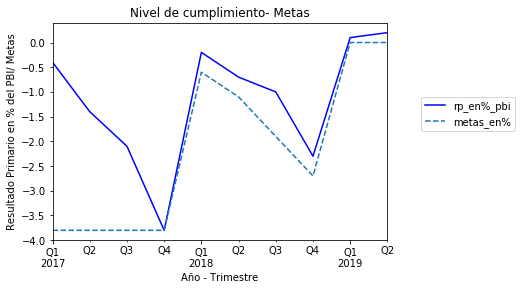

In [84]:
#reemplazo los pib de la tabla con los promedios calculados en "a"
for anio in range(2017,2020):
    pbi_rp.loc[pbi_rp.index.year==anio, "pib_precios_corrientes"]= pbi_prom.loc[anio,"pib_precios_corrientes"]
    
    
#NO FUNCIONA!!
# if pbi_rp.index.year==2016 :
#      pbi_rp["pib_precios_corrientes"]= a.loc[2016,"pib_precios_corrientes"]
# elif pbi_rp.index.year==2017 :
#      pbi_rp["pbi_precios_corrientes"]= a.loc[2017,"pib_precios_corrientes"]
# elif pbi_rp.index.year==2018 :
#      pbi_rp["pbi_precios_corrientes"]= a.loc[2018,"pib_precios_corrientes"]
# elif pbi_rp.index.year==2019 :
#      pbi_rp["pbi_precios_corrientes"]= a.loc[2019,"pib_precios_corrientes"]

   

#Ahora si, es posible calcular el rp en términos del pbi



pbi_rp["metas_en%"]= [ -3.8, -3.8, -3.8, -3.8, -0.6, -1.1, -1.9, -2.7, 0, 0 ]
pbi_rp["metas_en%"]= pd.to_numeric(pbi_rp["metas_en%"])
pbi_rp["metas_en%"]= pbi_rp["metas_en%"].astype("float64")
pbi_rp["rp_en%_pbi"]=round((pbi_rp["resultado_primario"] / pbi_rp["pib_precios_corrientes"]) *100,1)

a=pbi_rp.plot(y='rp_en%_pbi', title="Nivel de cumplimiento- Metas", color="blue", fontsize=10)
pbi_rp.plot(y='metas_en%',ax=a, style='--')
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("Resultado Primario en % del PBI/ Metas")
plt.xlabel("Año - Trimestre");
plt.legend(loc=[1.1,0.5]);

In [19]:
pbi_rp

,pib_precios_corrientes,resultado_primario,metas_en%,rp_en%_pbi
indice_tiempo,,,,
2017-01-01,1.064478e+07,-41343.8,-3.8,-0.4
2017-04-01,1.064478e+07,-144285.6,-3.8,-1.4
2017-07-01,1.064478e+07,-222378.9,-3.8,-2.1
2017-10-01,1.064478e+07,-404142.3,-3.8,-3.8
2018-01-01,1.460579e+07,-31000.9,-0.6,-0.2
2018-04-01,1.460579e+07,-105824.7,-1.1,-0.7
2018-07-01,1.460579e+07,-153315.0,-1.9,-1.0
2018-10-01,1.460579e+07,-338987.3,-2.7,-2.3
2019-01-01,1.755554e+07,10347.0,0.0,0.1
